## Mini-Project
# k-means clustering
In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy
import pickle
from sklearn.cluster import KMeans

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png",
         f1_name="feature 1", f2_name="feature 2"):
    """
        some plotting code designed to help you
        visualize your clusters
    """

    # plot each cluster with a different color--add more colors for
    # drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1],
                    color = colors[pred[ii]])

    # if you like, place red stars over points that are POIs
    # (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1],
                            color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

Load in the dict of dicts containing all the data on each person in the dataset.  
Remember: there's an outlier, remove it! 

In [3]:
dataset_path = '../final_project/final_project_dataset.pkl'
data_dict = pickle.load(open(dataset_path, 'rb'))
data_dict.pop("TOTAL", 0);

Determine which features the code uses for clustering.  
It can be any key in the person-level dictionary (salary, director_fees, etc.) 

In [4]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

Plot the data.  
Think a little bit about what clusters you would expect to arise if 2 clusters are created.

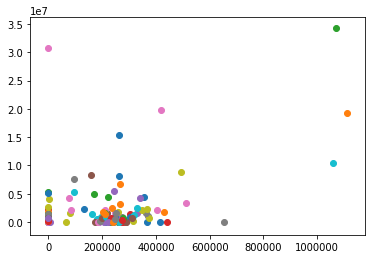

In [5]:
# in the "clustering with 3 features" part of the mini-project,
# you'll want to change this line to 
# for f1, f2, _ in finance_features:
# (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter(f1, f2)
plt.show()

Deploy k-means clustering on the financial_features data, with **2 clusters** specified as a parameter.  
In the scatterplot that pops up, are the clusters what you expected?

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(finance_features)
pred = kmeans.predict(finance_features)

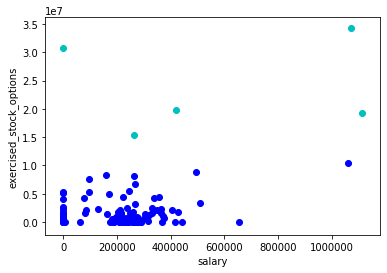

In [7]:
Draw(pred, finance_features, poi, mark_poi=False,
     name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)

Add a third feature to features_list, “total_payments".  
Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions).  
Compare the plot with the clusterings to the one you obtained with 2 input features.  
Do any points switch clusters? How many?  
This new clustering, using 3 features, couldn’t have been guessed by eye; it was the k-means algorithm that identified it.

In [8]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(finance_features)
pred = kmeans.predict(finance_features)

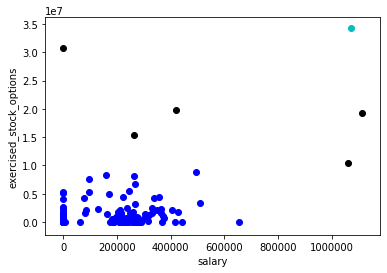

In [10]:
Draw(pred, finance_features, poi, mark_poi=False,
     name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

In [11]:
def clean_data(data_dict, feature):
    cleaned_data_dict = \
        {k:v for k, v in data_dict.items() \
         if data_dict[k][feature] != 'NaN'}

    return cleaned_data_dict

def order_data(data_dict, order_by):
    ordered_data_dict = sorted(
        data_dict.items(),
        key=lambda item: data_dict.get(item[0])[order_by])
    
    return ordered_data_dict

def print_max_min(data_dict, feature):
    cleaned_data_dict = clean_data(data_dict, feature)
    ordered_data_dict = order_data(cleaned_data_dict, feature)
    
    print(f'Feature:\t{feature}')
    print('Minimum:\t{}:\t{:8d}' \
          .format(ordered_data_dict[0][0],
                  ordered_data_dict[0][1][feature]))

    print('Maximum:\t{}:\t{:8d}' \
          .format(ordered_data_dict[-1][0],
                  ordered_data_dict[-1][1][feature]))    

In [12]:
feature = 'exercised_stock_options'
print_max_min(data_dict, feature)

Feature:	exercised_stock_options
Minimum:	BELFER ROBERT:	    3285
Maximum:	LAY KENNETH L:	34348384


In [13]:
feature = 'salary'
print_max_min(data_dict, feature)

Feature:	salary
Minimum:	BANNANTINE JAMES M:	     477
Maximum:	SKILLING JEFFREY K:	 1111258


The plot below shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (plot below) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters.  

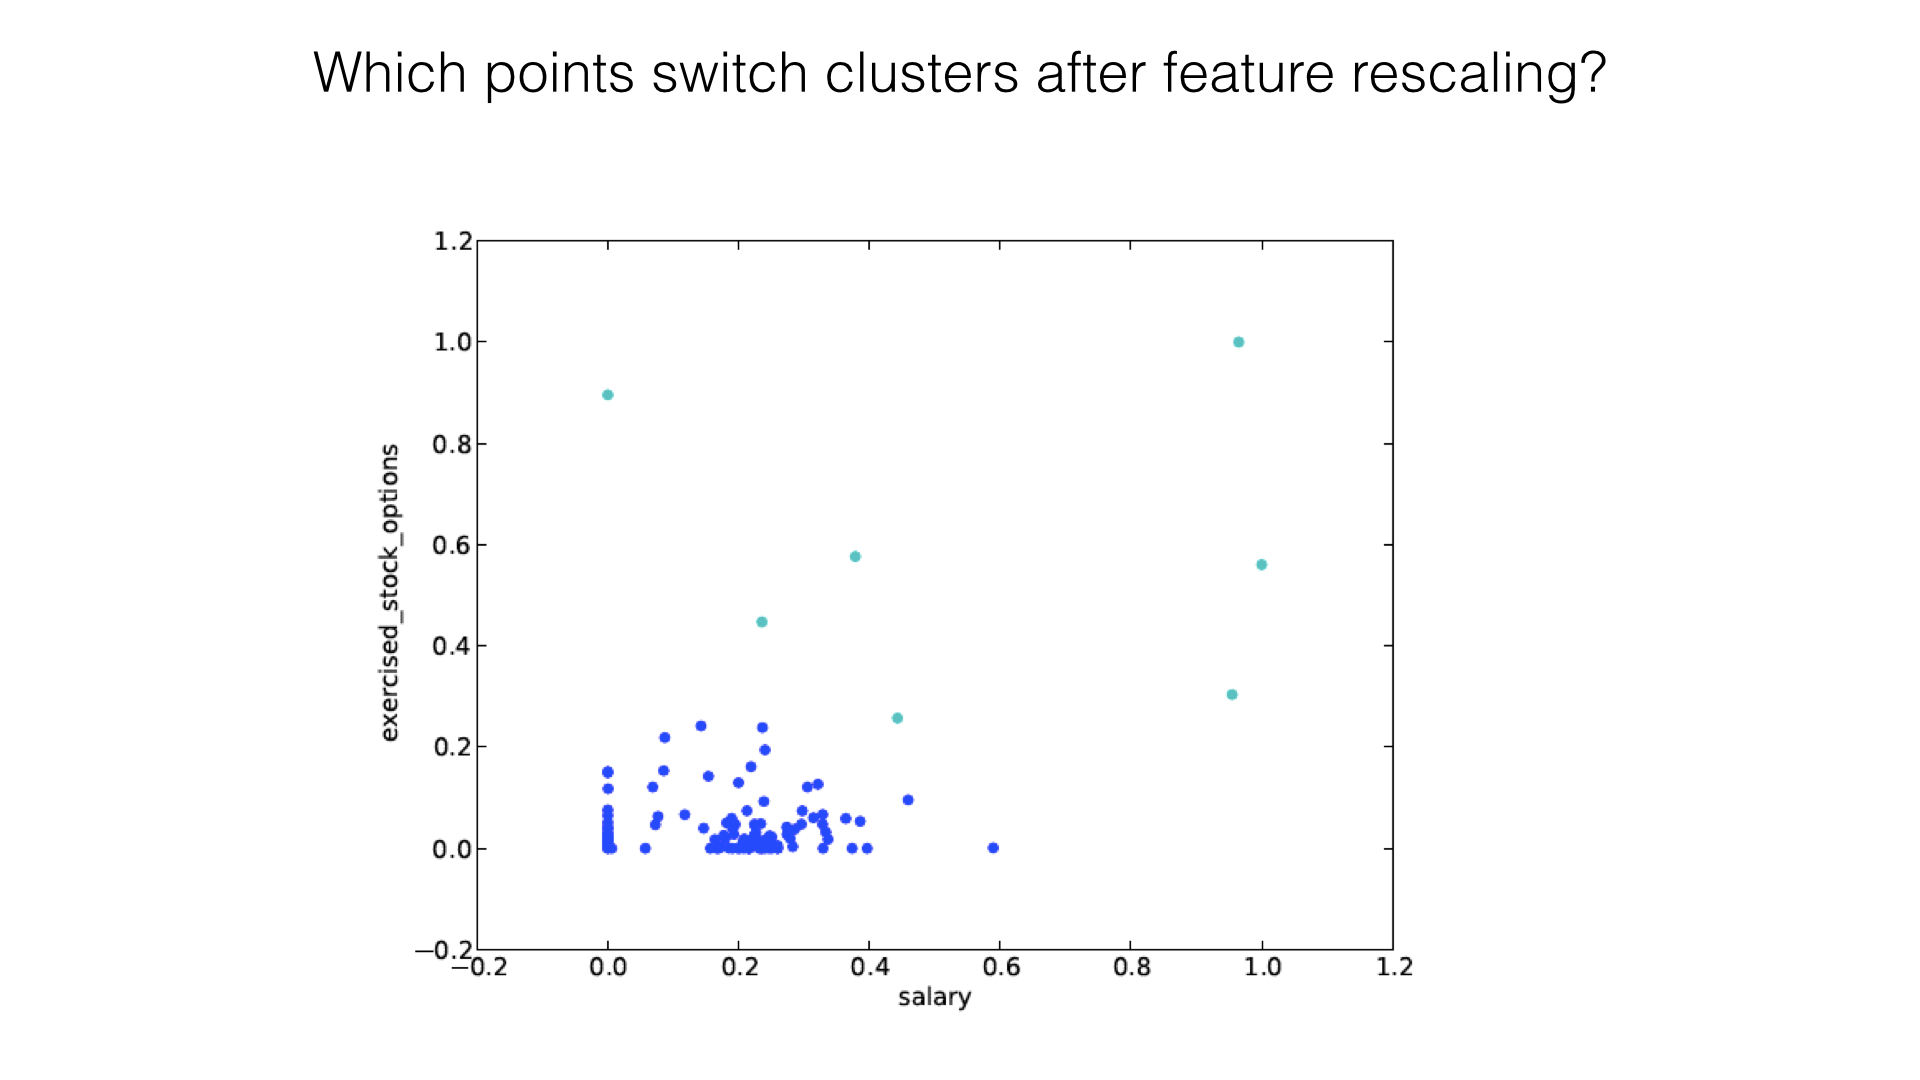